In [1]:
import pandas as pd

dataset = pd.read_csv(r'data\csv\features.csv')


In [10]:


X = dataset.drop('is_bot', axis=1).drop('audio_name', axis=1)
y = dataset['is_bot'] 

,mfcc_mean_0,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,mfcc_mean_4,mfcc_mean_5,mfcc_mean_6,mfcc_mean_7,mfcc_mean_8,mfcc_mean_9,...,mfcc_std_17,mfcc_std_18,mfcc_std_19,mean_sc,std_sc,skew_sc,mean_sr,std_sr,mean_sb,std_sb
0,-409.38623,90.93440,6.456916,14.287674,4.915765,2.040792,8.117986,2.753147,-6.707080,-2.890579,...,6.165629,6.882908,9.738603,2160.977265,1026.204080,1.224551,4666.559872,2547.859980,2408.977230,773.135932
1,-351.58087,94.22031,27.441017,26.744960,23.470596,9.831022,8.414692,1.485330,-8.475068,-4.515779,...,6.345599,6.748109,5.912208,2112.241830,1546.511106,1.528676,4166.987061,2931.210542,2367.408568,686.073537
2,-365.74347,72.92849,27.074387,29.077470,19.418080,10.929294,9.066201,8.681786,-5.280898,-1.369664,...,6.654031,6.220577,6.506847,2375.481401,1642.532750,1.117431,4587.721369,2927.102512,2411.889599,642.909311
3,-343.60083,83.17586,30.230846,32.294376,17.606165,10.464132,9.285241,4.391527,-6.964772,-2.216673,...,6.629288,6.835907,6.989620,2306.057619,1635.816125,1.136537,4421.763324,2936.731862,2379.474400,678.210686
4,-365.11575,88.45251,27.786852,28.683650,17.522547,11.346336,12.233680,4.771894,-6.950078,-1.519692,...,6.808092,6.833555,6.553001,2162.760891,1482.452387,1.388116,4296.373634,2822.825194,2392.300242,651.557371


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np
rom tqdm.notebook import tqdm

clf = RandomForestClassifier(n_estimators=100, random_state=2)
scores = np.array([])
for i in range(10):
    
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)
    
    scores = np.append(scores, cross_val_score(clf, X, y, cv=skf, scoring='accuracy'))
m = np.mean([i.mean() for i in scores])
s = np.mean([i.std() for i in scores])
print(f"Средняя точность: {m}")
print(f"Разброс (std): {s}")

Средняя точность: [np.float64(0.9987745098039216), np.float64(1.0), np.float64(0.9993872549019608), np.float64(1.0), np.float64(0.9993868792152054), np.float64(0.9993872549019608), np.float64(0.9987745098039216), np.float64(1.0), np.float64(1.0), np.float64(0.9987737584304108), np.float64(0.9993872549019608), np.float64(0.9987745098039216), np.float64(0.9993872549019608), np.float64(1.0), np.float64(0.9993868792152054), np.float64(0.9987745098039216), np.float64(1.0), np.float64(0.9987745098039216), np.float64(1.0), np.float64(0.9987737584304108), np.float64(0.9993872549019608), np.float64(0.9981617647058824), np.float64(0.9993872549019608), np.float64(0.9993872549019608), np.float64(0.9993868792152054), np.float64(1.0), np.float64(1.0), np.float64(0.9975490196078431), np.float64(1.0), np.float64(0.9981606376456161), np.float64(0.9993872549019608), np.float64(0.9987745098039216), np.float64(0.9981617647058824), np.float64(0.9993872549019608), np.float64(1.0), np.float64(0.9987745098039

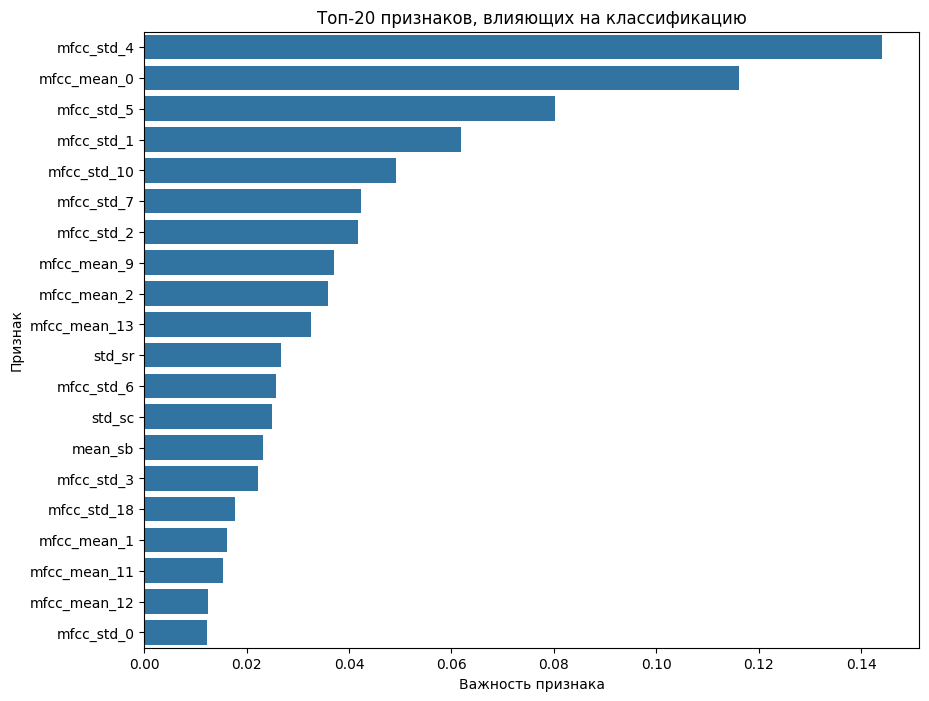

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

clf.fit(X, y)

feature_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_imp.head(20), y=feature_imp.head(20).index)
plt.title('Топ-20 признаков, влияющих на классификацию')
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.show()


Accuracy: 1.0
Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3930
           1       1.00      1.00      1.00      4229

    accuracy                           1.00      8159
   macro avg       1.00      1.00      1.00      8159
weighted avg       1.00      1.00      1.00      8159



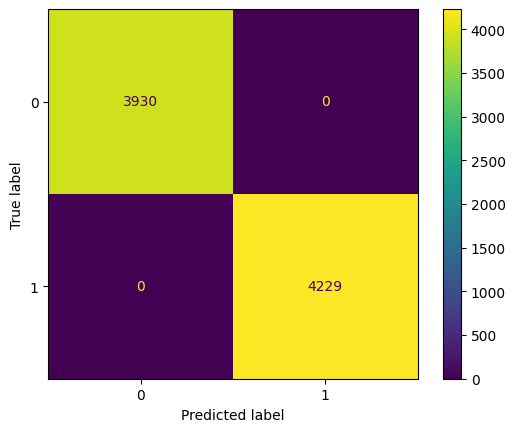

In [9]:
from sklearn.metrics import classification_report, accuracy_score,  ConfusionMatrixDisplay, confusion_matrix
y_pred = clf.predict(X)
print("Accuracy:", accuracy_score(y_pred, y))
print("Report:\n", classification_report(y_pred, y))
cm = confusion_matrix(y, y_pred)
ConfusionMatrixDisplay(cm).plot()